# Bagian Baru

In [2]:
!pip install wordcloud
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import re
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk import bigrams
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [3]:
# 1) Cari satu artikel ilmiah bebas
# Membaca isi file teks
with open("cuplikan teks.txt", "r", encoding="utf-8") as f:
    teks = f.read()

# Cek isi teks
print("Jumlah karakter:", len(teks))
print("Cuplikan teks:\n", teks[:10678])  # tampilkan 445 karakter pertama

# SKEMA WARNA UTAMA (Tema: Biru Laut & Navy)
sea_blue = "#00BFFF"   # biru laut cerah
navy_blue = "#001F3F"  # navy gelap
bg_light = "#E0F7FF"   # latar lembut

Jumlah karakter: 10679
Cuplikan teks:
 Judul Artikel: Analisis Kesalahan Penerjemahan Teks Bahasa Indonesia ke dalam
Bahasa Arab pada ChatGPT (Studi Analisis Morfologi dan Sintaksis)
Penulis: Afriazil Arief Saimin, Rinaldi Supriadi, Mohamad Zaka Al Farisi  
Afiliasi: Universitas Pendidikan Indonesia, Bandung, Indonesia  
Corresponding Author: Afriazil Arief Saimin  
Email: afriazil.arief.arb12@upi.edu  
Asal Negara: Indonesia  
DOI: 10.47435/naskhi.v6i1.2668  
Bahasa: Indonesia  


Abstrak
Penelitian ini mengkaji kesalahan terjemahan morfologi dan sintaksis yang dilakukan ChatGPT dalam terjemahan dari bahasa Indonesia ke bahasa Arab. Dengan memanfaatkan sistem terjemahan ChatGPT, penelitian ini berupaya memastikan apakah ada kesalahan terjemahan morfologi dan sintaksis serta menentukan letak kesalahan terjemahan sintaksis dan morfologisnya. Sampel purposif merupakan kaidah yang dimanfaatkan pada studi ini guna mendapatkan informasi. Dengan memanfaatkan pendekatan analisis isi, studi li

Kode tersebut berfungsi untuk membaca isi file "cuplikan teks.txt" dan menampilkan sebagian isinya sebagai pratinjau untuk memastikan file terbaca dengan benar. Selain itu, ditetapkan pula skema warna utama bertema biru laut, dengan warna biru cerah sebagai warna utama, navy sebagai aksen, dan biru muda lembut sebagai latar untuk menjaga konsistensi tampilan visualisasi.


In [12]:
# Bagi paragraf (berdasarkan 2 newline)
paragraphs = [p.strip() for p in teks.split("\n\n") if p.strip()]

# Bagi kalimat (regex: titik, tanda tanya, tanda seru)
sentences = re.split(r'(?<=[.!?])\s+', teks)
sentences = [s.strip() for s in sentences if s.strip()]

# Bagi kata
words = re.findall(r'\b[a-zA-ZÀ-ÖØ-öø-ÿ’‘\-]+\b', teks.lower())

Kode tersebut digunakan untuk membagi teks menjadi beberapa bagian agar dapat dianalisis lebih lanjut. Pertama, teks dibagi menjadi paragraf berdasarkan dua kali pergantian baris. Kemudian, teks dipisah menjadi kalimat menggunakan pola ekspresi reguler yang mengenali tanda titik, tanda tanya, dan tanda seru sebagai akhir kalimat. Setelah itu, teks diuraikan menjadi kata menggunakan pencocokan pola huruf, termasuk huruf dengan aksen atau tanda baca khusus, dan semuanya diubah menjadi huruf kecil agar konsisten saat dilakukan analisis.

In [15]:
# 2. Tabel pivot konsonan dan vokal dalam kata

def count_vowels_consonants(word):
    vowels = re.findall(r'[aeiou]', word)
    consonants = re.findall(r'[bcdfghjklmnpqrstvwxyz]', word)
    return len(vowels), len(consonants)

data_kata = []
for w in words:
    v, c = count_vowels_consonants(w)
    data_kata.append({'kata': w, 'vokal': v, 'konsonan': c})

df = pd.DataFrame(data_kata)

Kode tersebut digunakan untuk menghitung jumlah huruf vokal dan konsonan pada setiap kata dalam teks, kemudian menyusunnya ke dalam bentuk tabel pivot. Fungsi `count_vowels_consonants()` mendeteksi huruf vokal dan konsonan menggunakan ekspresi reguler, lalu mengembalikan jumlah masing-masing. Setiap kata disimpan bersama jumlah vokal dan konsonannya dalam bentuk daftar yang kemudian diubah menjadi DataFrame menggunakan pandas.

In [6]:
# 2.a. Heatmap frekuensi dari tiap kombinasi konsonan-vokal yang ditemukan

# Pisahkan huruf vokal dan konsonan dalam tiap kata
vokal = set("aiueoAIUEO")
df['vokal'] = df['kata'].apply(lambda x: sum(1 for c in x if c in vokal))
df['konsonan'] = df['kata'].apply(lambda x: sum(1 for c in x if c.isalpha() and c not in vokal))

# Buat pivot tabel
pivot_freq = pd.pivot_table(df, index='vokal', columns='konsonan', values='kata', aggfunc='count', fill_value=0)
fig_heatmap1 = go.Figure(data=go.Heatmap(
    z=pivot_freq.values,
    x=pivot_freq.columns,
    y=pivot_freq.index,
    colorscale=[[0, navy_blue], [1, sea_blue]],
    text=pivot_freq.values,
    texttemplate="%{text}",
    hoverongaps=False,
    colorbar=dict(title="Frekuensi")  # label di colorbar
))
fig_heatmap1.update_layout(
    title="Heatmap Frekuensi Kombinasi Vokal–Konsonan yang ditemukan",
    xaxis_title="Jumlah Konsonan",
    yaxis_title="Jumlah Vokal",
    width=800,
    height=600,
    font=dict(color=navy_blue, size=14, family="Arial"),
    plot_bgcolor=bg_light,
    margin=dict(l=80, r=80, t=80, b=80)
)
fig_heatmap1.show()


Berdasarkan hasil output heatmap, dapat dilihat bahwa teks ilmiah yang dianalisis memiliki distribusi kombinasi huruf vokal dan konsonan yang cukup seimbang. Total terdapat 7 kategori jumlah vokal (0–6 vokal) dan 11 kategori jumlah konsonan (0–10 konsonan). Kombinasi yang paling sering muncul berada pada kisaran dua hingga empat huruf vokal dan tiga hingga enam huruf konsonan. Warna biru muda pada heatmap menunjukkan frekuensi tertinggi, yang berarti kata dengan jumlah tersebut paling umum ditemukan dalam teks. Sebaliknya, kata dengan jumlah vokal atau konsonan yang terlalu sedikit maupun terlalu banyak cenderung jarang muncul. Hal ini menunjukkan bahwa struktur kata dalam teks ilmiah cenderung stabil dan mengikuti pola umum bahasa formal, di mana keseimbangan antara vokal dan konsonan membantu menjaga keterbacaan serta kejelasan istilah ilmiah.

In [24]:
# 2.b. Heatmap cacah kata yang masuk dalam tiap kombinasi konsonan-vokal

pivot_unique = pd.pivot_table(df,index='vokal', columns='konsonan', values='kata', aggfunc=lambda x: len(set(x)), fill_value=0)

fig_heatmap2 = go.Figure(data=go.Heatmap(
    z=pivot_unique.values,
    x=pivot_unique.columns,
    y=pivot_unique.index,
    colorscale=[[0, navy_blue], [1, sea_blue]],
    text=pivot_unique.values,
    texttemplate="%{text}",
    hoverongaps=False,
    colorbar=dict(title="Frekuensi")
))


fig_heatmap2.update_layout(
    title="Heatmap Cacah Kata yang Masuk dalam tiap Kombinasi Konsonan-Vokal",
    xaxis_title="Jumlah Konsonan",
    yaxis_title="Jumlah Vokal",
    width=800,
    height=600,
    font=dict(color=navy_blue, size=14, family="Arial"),
    plot_bgcolor=bg_light,
    margin=dict(l=80, r=80, t=80, b=80)
)

fig_heatmap2.show()

Berdasarkan hasil output heatmap pada analisis cacah kata unik, terlihat bahwa pola distribusi jumlah huruf vokal dan konsonan relatif serupa dengan hasil sebelumnya, namun nilai frekuensinya lebih kecil karena setiap kata hanya dihitung satu kali meskipun muncul berulang dalam teks. Terdapat 7 kategori jumlah vokal (0–6 vokal) dan 11 kategori jumlah konsonan (0–10 konsonan) yang membentuk variasi kata. Kombinasi dua hingga empat huruf vokal serta tiga hingga lima huruf konsonan menjadi pola yang paling dominan dan sering muncul. Area berwarna biru muda pada heatmap menandakan kombinasi yang paling sering ditemukan, sedangkan area berwarna lebih gelap menunjukkan jumlah kata yang lebih sedikit. Pola ini menggambarkan bahwa struktur kata dalam teks ilmiah cenderung seimbang, dengan bentuk kata yang tidak terlalu pendek maupun panjang sehingga efisien dan mudah dipahami. Selain itu, hasil ini menunjukkan bahwa meskipun beberapa kata muncul berulang, teks tetap memiliki tingkat keragaman kosakata yang baik dan mendukung kejelasan penyampaian makna dalam konteks ilmiah.

In [16]:
# 3. Histogram jumlah kata dalam kalimat

jumlah_kata_dalam_kalimat = [len(re.findall(r'\b[a-zA-ZÀ-ÖØ-öø-ÿ’‘\-]+\b', s)) for s in sentences]

fig_hist1 = px.histogram(
    x=jumlah_kata_dalam_kalimat,
    nbins=10,
    title="Histogram Jumlah Kata dalam Kalimat",
    labels={'x': 'Jumlah Kata dalam Kalimat', 'y': 'Frekuensi'},
    color_discrete_sequence=[sea_blue]
)
fig_hist1.update_traces(marker_line_color=navy_blue, marker_line_width=1.3)
fig_hist1.update_layout(
    width=800, height=500,
    font=dict(color=navy_blue, size=14, family="Arial"),
    plot_bgcolor=bg_light,
    margin=dict(l=80, r=80, t=80, b=80)
)
fig_hist1.show()


rata2_kata = round(sum(jumlah_kata_dalam_kalimat) / len(jumlah_kata_dalam_kalimat), 2)
print(f"Rata-rata kata dalam kalimat: {rata2_kata}")

Rata-rata kata dalam kalimat: 26.52


Berdasarkan hasil output histogram, terlihat bahwa sebagian besar kalimat dalam teks ilmiah terdiri dari sekitar 10 hingga 30 kata. Frekuensi tertinggi berada pada kisaran 20 kata per kalimat, sedangkan hanya sedikit kalimat yang memiliki panjang lebih dari 50 kata. Rata-rata panjang kalimat adalah sekitar 26,5 kata, yang menunjukkan bahwa teks ilmiah ini menggunakan kalimat dengan struktur sedang, tidak terlalu pendek namun juga tidak terlalu panjang. Pola ini menggambarkan gaya penulisan yang formal dan informatif, sehingga setiap kalimat mampu menjelaskan ide secara efektif dan mudah dipahami oleh pembaca.

In [17]:
# 4. Histogram jumlah kalimat dalam paragraf

# Hitung jumlah kalimat dalam setiap paragraf
jumlah_kalimat_dalam_paragraf = []
for p in paragraphs:
    kalimat = re.split(r'(?<=[.!?])\s+', p)
    kalimat = [s.strip() for s in kalimat if s.strip()]
    jumlah_kalimat_dalam_paragraf.append(len(kalimat))

fig_hist2 = px.histogram(
    x=jumlah_kalimat_dalam_paragraf,
    nbins=len(set(jumlah_kalimat_dalam_paragraf)),
    title="Histogram Jumlah Kalimat dalam Paragraf",
    labels={'x': 'Jumlah Kalimat dalam Paragraf', 'y': 'Frekuensi'},
    color_discrete_sequence=[sea_blue]
)
fig_hist2.update_traces(marker_line_color=navy_blue, marker_line_width=1.3)
fig_hist2.update_layout(
    width=800, height=500,
    font=dict(color=navy_blue, size=14, family="Arial"),
    plot_bgcolor=bg_light,
    margin=dict(l=80, r=80, t=80, b=80)
)
fig_hist2.show()

rata2_kalimat = round(sum(jumlah_kalimat_dalam_paragraf) / len(jumlah_kalimat_dalam_paragraf), 2)
print(f"Rata-rata kalimat dalam paragraf: {rata2_kalimat}")

Rata-rata kalimat dalam paragraf: 13.0


Berdasarkan hasil output histogram, terlihat bahwa sebagian besar paragraf dalam teks terdiri dari sekitar 5 hingga 10 kalimat, sementara hanya sedikit paragraf yang memiliki lebih dari 30 kalimat. Rata-rata jumlah kalimat dalam paragraf adalah sekitar 13 kalimat, menunjukkan bahwa struktur paragraf dalam teks ilmiah cenderung panjang dan informatif. Pola ini mencerminkan karakteristik tulisan ilmiah yang berisi penjelasan mendalam dalam satu paragraf agar ide atau argumen tersampaikan secara lengkap.


In [18]:
# Analisis tambahan Frekuensi Huruf

# Hitung frekuensi huruf a-z
from collections import Counter
huruf_hitung = Counter(re.findall(r'[a-z]', teks.lower()))
df_huruf = pd.DataFrame(huruf_hitung.items(), columns=['huruf', 'frekuensi']).sort_values('frekuensi', ascending=False)

fig_huruf = px.bar(
    df_huruf, x='huruf', y='frekuensi',
    title="Frekuensi Huruf dalam Teks Ilmiah",
    labels={'huruf': 'Huruf', 'frekuensi': 'Frekuensi'},
    color_discrete_sequence=[sea_blue]
)
fig_huruf.update_traces(marker_line_color=navy_blue, marker_line_width=1.3)
fig_huruf.update_layout(
    width=800, height=500,
    font=dict(color=navy_blue, size=14, family="Arial"),
    plot_bgcolor=bg_light,
    margin=dict(l=80, r=80, t=80, b=80)
)
fig_huruf.show()

Berdasarkan hasil output grafik, terlihat bahwa huruf yang paling sering muncul dalam teks ilmiah adalah huruf vokal seperti “a” dan “e”, diikuti oleh konsonan seperti “n”, “i”, dan “t”. Pola ini menunjukkan bahwa teks ilmiah dalam bahasa Indonesia cenderung menggunakan struktur kata yang kaya akan huruf vokal, sesuai dengan karakteristik bahasa Indonesia yang umumnya memiliki pola suku kata terbuka. Sementara itu, huruf seperti “q”, “v”, dan “z” memiliki frekuensi sangat rendah karena jarang digunakan dalam kosakata umum bahasa Indonesia.


In [19]:
# Analisis tambahan Hubungan Panjang Paragraf dan Rata-rata Panjang Kalimat

rata2_kata_dalam_paragraf = []
for p in paragraphs:
    kalimat = re.split(r'(?<=[.!?])\s+', p)
    kalimat = [s for s in kalimat if s.strip()]
    panjang = [len(re.findall(r'\b[a-zA-ZÀ-ÖØ-öø-ÿ’‘\-]+\b', s)) for s in kalimat]
    if panjang:
        rata2_kata_dalam_paragraf.append({'jumlah_kalimat': len(kalimat), 'rata2_kata_dalam_kalimat': sum(panjang)/len(panjang)})

df_para = pd.DataFrame(rata2_kata_dalam_paragraf)

fig_scatter = px.scatter(
    df_para, x='jumlah_kalimat', y='rata2_kata_dalam_kalimat',
    title="Hubungan Panjang Paragraf dan Rata-rata Panjang Kalimat",
    labels={'jumlah_kalimat': 'Jumlah Kalimat dalam Paragraf', 'rata2_kata_dalam_kalimat': 'Rata-rata Jumlah Kata dalam Kalimat'},
    color_discrete_sequence=[sea_blue],
)
fig_scatter.update_traces(marker=dict(size=10, line=dict(width=1.5, color=navy_blue)))
fig_scatter.update_layout(
    width=800, height=500,
    font=dict(color=navy_blue, size=14, family="Arial"),
    plot_bgcolor=bg_light,
    margin=dict(l=80, r=80, t=80, b=80)
)
fig_scatter.show()

Berdasarkan hasil output scatter plot, terlihat bahwa paragraf dengan jumlah kalimat lebih sedikit cenderung memiliki kalimat yang lebih panjang secara rata-rata, sedangkan paragraf yang lebih panjang memiliki kalimat yang lebih singkat dan ringkas. Pola ini menunjukkan adanya keseimbangan antara jumlah kalimat dan kompleksitas kalimat dalam teks ilmiah, di mana penulis berusaha menjaga keterbacaan dengan menyesuaikan panjang kalimat sesuai dengan panjang paragraf.


In [20]:
# Type-Token Ratio (Keragaman Kosakata)

total_kata = len(words)
unik_kata = len(set(words))
ttr = round(unik_kata / total_kata, 3)

fig_ttr = go.Figure(data=[go.Pie(
    labels=['Kata Unik', 'Kata Berulang'],
    values=[unik_kata, total_kata - unik_kata],
    marker_colors=[sea_blue, navy_blue],
    hole=0.5
)])
fig_ttr.update_layout(
    title=f"Keragaman Kosakata (Type-Token Ratio = {ttr})",
    font=dict(color=navy_blue, size=14, family="Arial"),
    width=600, height=500,
    plot_bgcolor=bg_light,
)
fig_ttr.show()


Berdasarkan hasil output diagram donat, diperoleh nilai Type-Token Ratio (TTR) sebesar 0,363, yang berarti sekitar 36,3% dari seluruh kata dalam teks merupakan kata unik, sedangkan sisanya adalah kata yang berulang. Nilai ini menunjukkan bahwa teks memiliki tingkat keragaman kosakata yang cukup baik. Dengan proporsi kata berulang yang masih tinggi, dapat disimpulkan bahwa teks ilmiah ini menggunakan banyak istilah kunci yang diulang untuk menjaga konsistensi dan memperjelas pembahasan.


In [21]:
# Analisis tambahan Bigram (Dua Kata yang Sering Muncul Bersama)

# Buat bigram dan hitung frekuensinya
bigram_list = list(bigrams(words))
bigram_freq = Counter(bigram_list).most_common(15)
df_bigram = pd.DataFrame(bigram_freq, columns=['bigram', 'frekuensi'])
df_bigram['bigram'] = df_bigram['bigram'].apply(lambda x: ' '.join(x))

fig_bigram = px.bar(
    df_bigram, y='bigram', x='frekuensi',
    title="15 Bigram Paling Sering Muncul",
    labels={'bigram': 'Kombinasi Dua Kata', 'frekuensi': 'Frekuensi'},
    orientation='h',
    color_discrete_sequence=[sea_blue]
)
fig_bigram.update_traces(marker_line_color=navy_blue, marker_line_width=1.3)
fig_bigram.update_layout(
    width=800, height=600,
    font=dict(color=navy_blue, size=14, family="Arial"),
    plot_bgcolor=bg_light,
    margin=dict(l=80, r=80, t=80, b=80)
)
fig_bigram.show()

Berdasarkan hasil output grafik, terlihat bahwa bigram atau pasangan kata yang paling sering muncul adalah “bahasa arab”, “bahasa indonesia”, dan “dan sintaksis”. Pola ini menunjukkan bahwa teks ilmiah yang dianalisis berfokus pada topik kebahasaan, khususnya terkait perbandingan atau analisis linguistik antara bahasa Arab dan bahasa Indonesia. Selain itu, munculnya bigram seperti “kesalahan penerjemahan” dan “google translate” mengindikasikan bahwa pembahasan juga menyinggung isu penerjemahan dan teknologi bahasa.


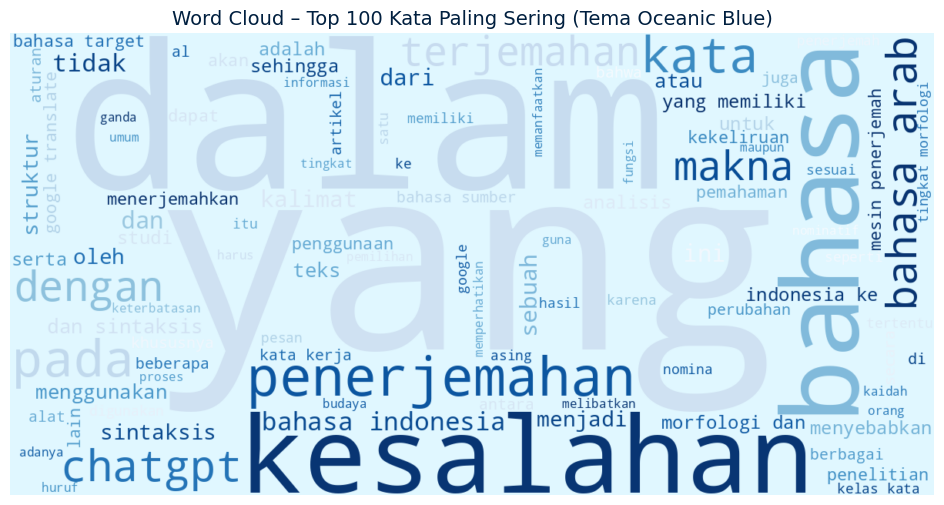

In [22]:
# Analisis tambahan WordCloud

# Gabungkan semua kata dalam teks
text_all = " ".join(df['kata'])

# Buat word cloud dengan warna biru laut & navy
wc = WordCloud(
    width=1200,
    height=600,
    background_color="#E0F7FF",  # latar lembut biru muda
    colormap="Blues",            # gradasi biru laut
    max_words=100,               # ambil 100 kata paling sering
    contour_color=navy_blue,     # garis tepi navy
    contour_width=2
).generate(text_all)

# Tampilkan word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud – Top 100 Kata Paling Sering (Tema Oceanic Blue)", fontsize=14, color=navy_blue, fontname="DejaVu Sans")
plt.show()


Berdasarkan hasil output word cloud, terlihat bahwa kata yang paling sering muncul dalam teks adalah “dalam”, “yang”, “bahasa”, “pada”, dan “terjemahan”. Ukuran kata yang lebih besar menunjukkan tingkat frekuensi kemunculan yang lebih tinggi. Pola ini menggambarkan fokus utama teks yang berkaitan dengan pembahasan linguistik dan penerjemahan bahasa. Dominasi kata-kata sedalamti “bahasa” dan “terjemahan” menunjukkan bahwa teks tersebut memiliki konteks ilmiah yang berhubungan dengan analisis bahasa, sedangkan kata sedalamti “dalam” dan “yang” menunjukkan struktur umum kalimat dalam bahasa Indonesia yang sering digunakan untuk menghubungkan ide atau penjelasan.


In [23]:
# Analisis tambahan distribusi panjang kata dalam teks

df['panjang_kata'] = df['kata'].apply(len)

fig_wordlen = px.histogram(
    df, x='panjang_kata', nbins=15,
    title="Distribusi Panjang Kata dalam Teks Ilmiah",
    labels={'panjang_kata': 'Jumlah Huruf dalam Kata', 'count': 'Frekuensi'},
    color_discrete_sequence=[sea_blue]
)
fig_wordlen.update_traces(marker_line_color=navy_blue, marker_line_width=1.3)
fig_wordlen.update_layout(
    width=800, height=500,
    font=dict(color=navy_blue, size=14, family="Arial"),
    plot_bgcolor=bg_light,
    margin=dict(l=80, r=80, t=80, b=80)
)
fig_wordlen.show()

rata2_panjang = round(df['panjang_kata'].mean(), 2)
print(f"Rata-rata panjang kata: {rata2_panjang} huruf")


Rata-rata panjang kata: 6.74 huruf


Berdasarkan hasil output histogram, terlihat bahwa distribusi panjang kata dalam teks ilmiah cenderung berpusat pada kisaran empat hingga tujuh huruf. Frekuensi tertinggi berada di sekitar lima huruf per kata, sementara kata yang terlalu pendek (kurang dari tiga huruf) atau terlalu panjang (lebih dari sepuluh huruf) muncul dengan frekuensi yang jauh lebih rendah. Nilai rata-rata panjang kata sebesar 6,74 huruf menunjukkan bahwa teks ilmiah ini lebih banyak menggunakan kata dengan panjang sedang. Pola distribusi ini menggambarkan karakteristik khas tulisan ilmiah yang menekankan keseimbangan antara kejelasan makna dan ketepatan istilah teknis.

**Kesimpulan**

Berdasarkan keseluruhan hasil analisis, dapat disimpulkan bahwa teks ilmiah dengan judul *Analisis Kesalahan Penerjemahan Teks Bahasa Indonesia ke dalam Bahasa Arab pada ChatGPT (Studi Analisis Morfologi dan Sintaksis)* memiliki struktur bahasa yang seimbang, informatif, dan sesuai dengan karakteristik penulisan akademik dalam bahasa Indonesia. Hasil analisis heatmap menunjukkan bahwa mayoritas kata dalam teks mengandung kombinasi dua hingga tiga huruf vokal dan tiga hingga lima huruf konsonan, dengan frekuensi kemunculan tertinggi pada kombinasi tersebut. Selain itu, pada analisis cacah kata unik, pola distribusinya menunjukkan hasil yang serupa dengan perhitungan frekuensi, namun dengan nilai yang lebih kecil karena setiap kata hanya dihitung satu kali. Terdapat 7 kategori jumlah vokal (0–6 vokal) dan 11 kategori jumlah konsonan (0–10 konsonan), dengan dominasi kombinasi dua hingga empat vokal dan tiga hingga lima konsonan. Hasil ini menggambarkan keseimbangan antara variasi bentuk kata dan kemunculannya, serta menunjukkan bahwa struktur kata dalam teks ilmiah cenderung stabil dan efisien sehingga mudah dipahami pembaca.

Selain itu, hasil analisis distribusi panjang kata menunjukkan bahwa sebagian besar kata memiliki panjang antara empat hingga tujuh huruf, dengan rata-rata 6,74 huruf per kata. Pola ini mencerminkan kecenderungan teks ilmiah untuk menggunakan kata dengan panjang sedang, yang menjaga keseimbangan antara kejelasan dan ketepatan istilah teknis dalam penyampaian informasi.

Rata-rata panjang kalimat mencapai sekitar 26 kata, dan rata-rata jumlah kalimat per paragraf sekitar 13 kalimat, menandakan penggunaan kalimat kompleks dan paragraf padat untuk menyampaikan ide secara terstruktur. Analisis tambahan memperlihatkan dominasi huruf vokal seperti “a” dan “e”, keseimbangan antara panjang paragraf dan kompleksitas kalimat, serta tingkat keragaman kosakata yang cukup baik dengan nilai Type-Token Ratio sebesar 0,363. Bigram yang paling sering muncul seperti “bahasa arab”, “bahasa indonesia”, dan “kesalahan penerjemahan” juga menegaskan fokus teks pada kajian linguistik dan penerjemahan.

Secara keseluruhan, teks ilmiah ini menunjukkan pola penulisan yang konsisten dengan gaya akademik yaitu memadukan kejelasan, kedalaman analisis, dan variasi bahasa sehingga mampu menyampaikan informasi secara efektif, padat, dan mudah dipahami oleh pembaca.
